bikesharing(https://www.kaggle.com/c/bike-sharing-demand/overview)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib as mpl
import seaborn as sns

# import matplotlib as mpl
# import seaborn as sns
# from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
#mpl.rcParams['axes.unicode_minus'] = False

In [43]:
train_data = pd.read_csv("data/train.csv", parse_dates=["datetime"])
train_data.shape

(10886, 12)

In [44]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [45]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

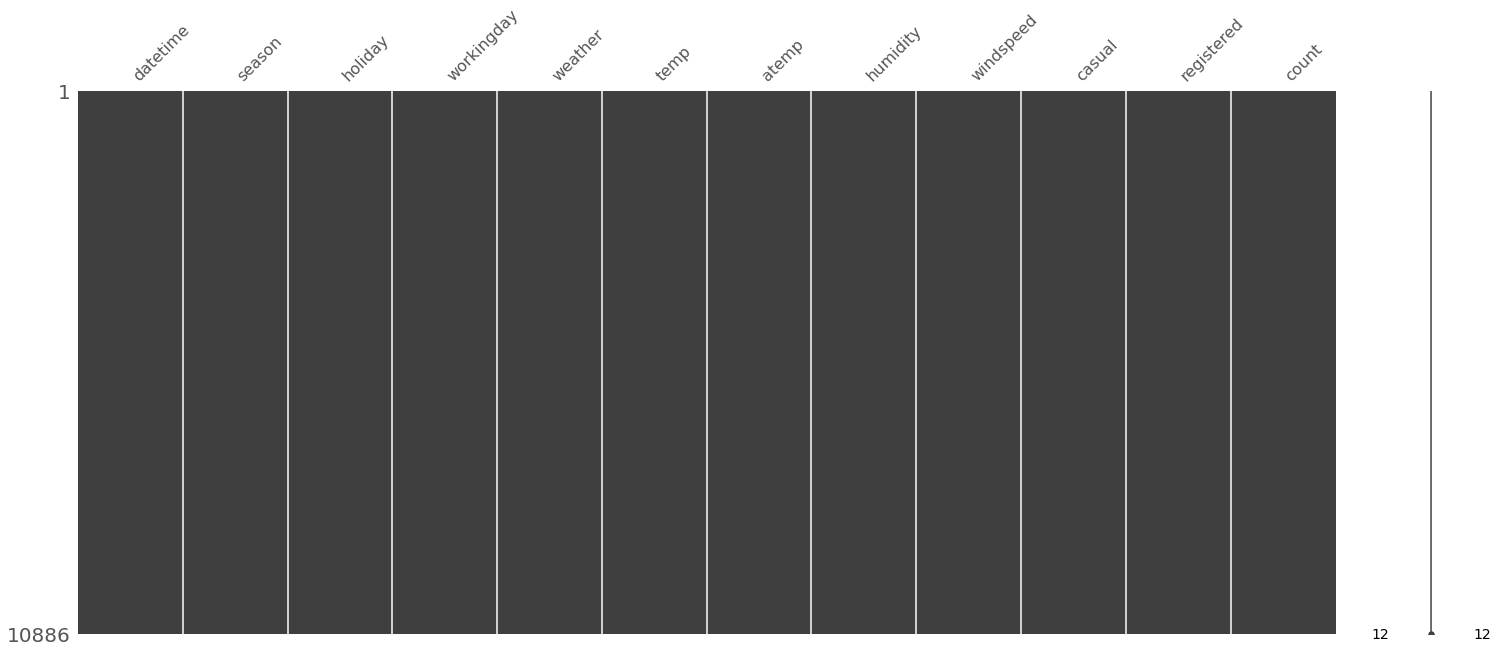

In [46]:
msno.matrix(train_data)

No null data

In [47]:
train_data["year"] = train_data["datetime"].dt.year
train_data["month"] = train_data["datetime"].dt.month
train_data["day"] = train_data["datetime"].dt.day
train_data["hour"] = train_data["datetime"].dt.hour
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


## Demand ( group by datetime )

[Text(0.5, 1.0, 'demand per hour')]

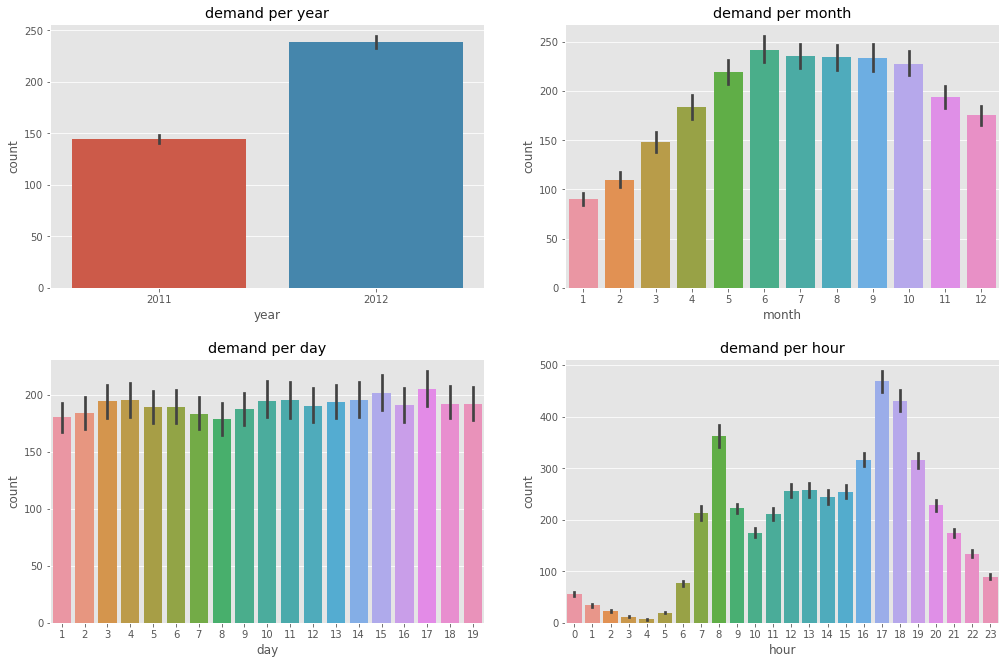

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 10)
fig.tight_layout(pad=5)

sns.barplot(data=train_data, x="year", y="count", ax=ax1)
sns.barplot(data=train_data, x="month", y="count", ax=ax2)
sns.barplot(data=train_data, x="day", y="count", ax=ax3)
sns.barplot(data=train_data, x="hour", y="count", ax=ax4)

ax1.set(title = "demand per year")
ax2.set(title = "demand per month")
ax3.set(title = "demand per day")
ax4.set(title = "demand per hour")

### summary

## Demand ( group by 'season' and 'workingday' )

[Text(0.5, 1.0, 'demand per workingday')]

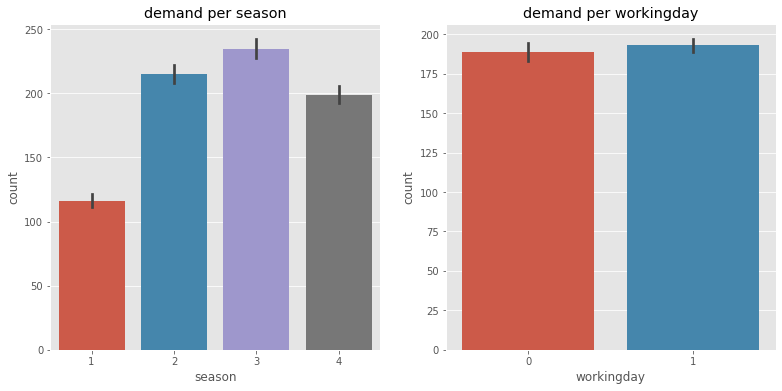

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(13, 6)

sns.barplot(data=train_data, x="season", y="count", ax=ax1)
sns.barplot(data=train_data, x="workingday", y="count", ax=ax2)

ax1.set(title = "demand per season")
ax2.set(title = "demand per workingday")

### summary

In [70]:
train_data["dayofweek"] = train_data["datetime"].dt.dayofweek

## separte by hour

[Text(0.5, 1.0, 'by season')]

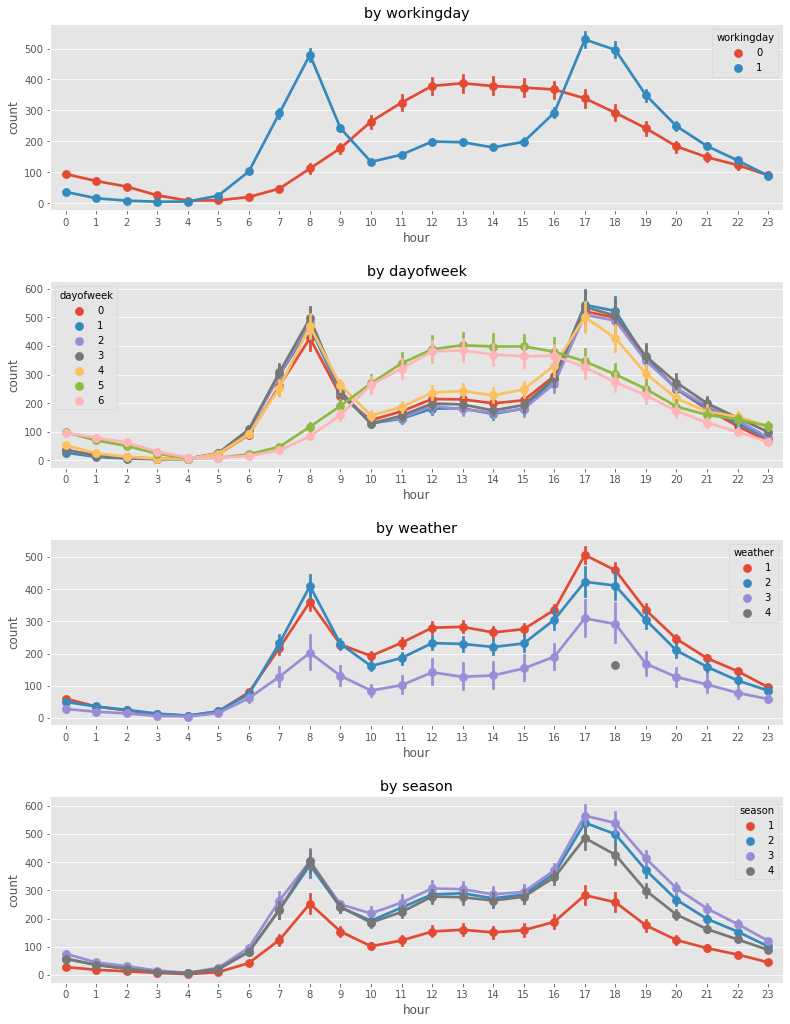

In [80]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12, 15)
fig.tight_layout(pad=5)

sns.pointplot(data=train_data, x="hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train_data, x="hour", y="count", hue="dayofweek", ax=ax2)
sns.pointplot(data=train_data, x="hour", y="count", hue="weather", ax=ax3)
sns.pointplot(data=train_data, x="hour", y="count", hue="season", ax=ax4)

ax1.set(title="by workingday")
ax2.set(title="by dayofweek")
ax3.set(title="by weather")
ax4.set(title="by season")

In [82]:
corrmat = train_data[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrmat = corrmat.corr()
print(corrmat)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


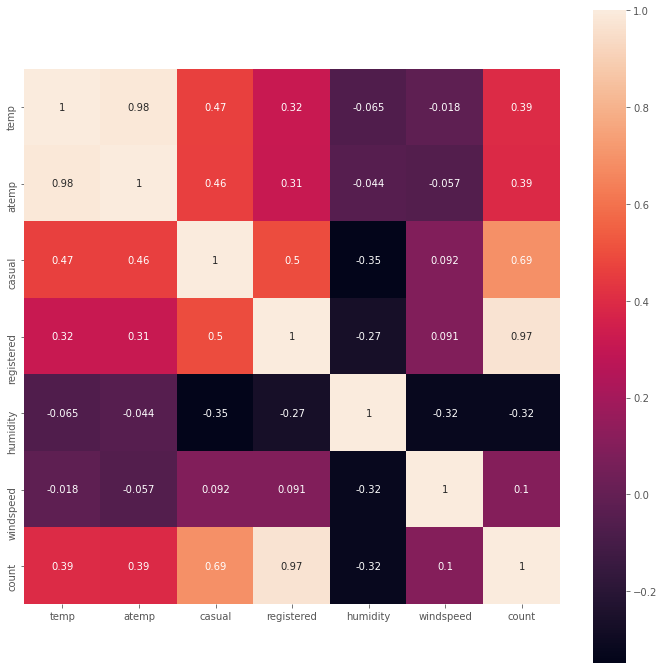

In [94]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)

sns.heatmap(corrmat, square=True, annot=True, vmax=1, vmin=-1)

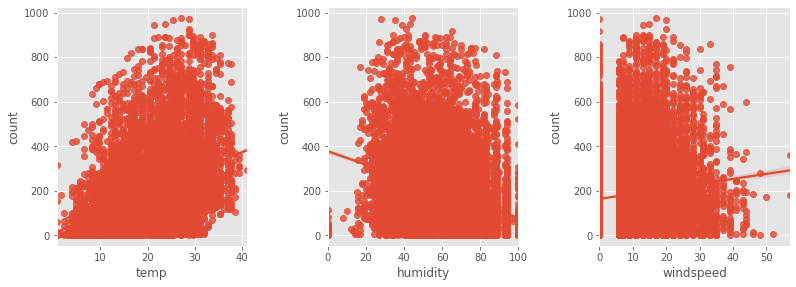

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
fig.tight_layout(pad=5)

sns.regplot(data=train_data, x="temp", y="count", ax=ax1)
sns.regplot(data=train_data, x="humidity", y="count", ax=ax2)
sns.regplot(data=train_data, x="windspeed", y="count", ax=ax3)

In [102]:
def conc_yearmonth(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

In [103]:
train_data["year_month"] = train_data["datetime"].apply(conc_yearmonth)

[Text(0.5, 1.0, 'demand per year_month')]

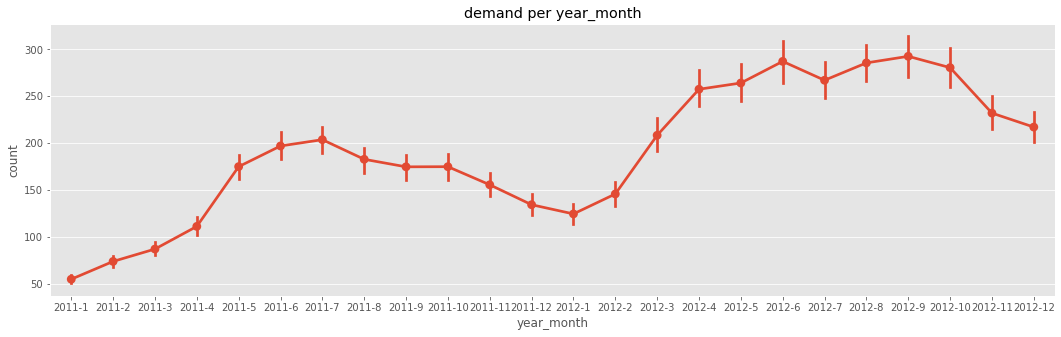

In [113]:
fig, ax = plt.subplots()
fig.set_size_inches(18,5)

sns.pointplot(data=train_data, x="year_month", y="count")
ax.set(title="demand per year_month")